In [1]:
import sys
# sys.path.append("src/MoDE_embeddings/")
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pickle
from MoDE_embeddings.MoDE import MoDE
from sklearn.manifold import TSNE, Isomap, MDS
from sklearn import datasets
from MoDE_embeddings.metrics import distance_metric, correlation_metric, order_preservation
%load_ext autoreload
%autoreload 2

In [2]:
with open("../parula_colormap.pkl", "rb") as f:
    p = pickle.load(f)

from matplotlib.colors import LinearSegmentedColormap

### loading the s_curve dataset

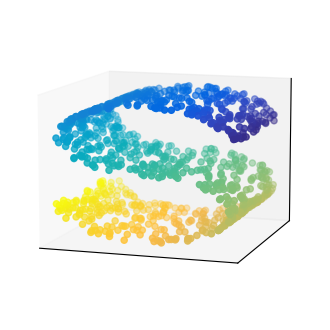

In [3]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
fig = plt.figure(figsize=(4, 6))

# Add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
parula_map = LinearSegmentedColormap.from_list('parula', p, N = n_points)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=parula_map)
ax.view_init(10, -72)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([]);

### Embedding with different methods

In [5]:
# MoDE
mode = MoDE(n_neighbor=10, max_iter=40000, tol=0.001, verbose=True)
x_2d_mode = mode.fit_transform(X, color)

# ISOMAP
isomap = Isomap(n_neighbors=10, n_components=2, tol=0.001)
x_2d_isomap = isomap.fit_transform(X)

# MDS
mds = MDS(eps=0.001, max_iter=3000)
x_2d_mds = mds.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, perplexity=3.3, n_iter=3000, verbose=1)
x_2d_tsne = tsne.fit_transform(X)

# UMAP
import umap
reducer = umap.UMAP(n_neighbors=10, n_components=2)
x_2d_umap = reducer.fit_transform(X)

start
KNN graph computed.
Incidence matrix created 
Bounds on correlations computed.
Number of iterations:
end of GD algorithm


/home/ahmad/anaconda3/envs/MoDE/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.072559
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.736351
[t-SNE] KL divergence after 3000 iterations: 0.369877


### visualizing embeddings

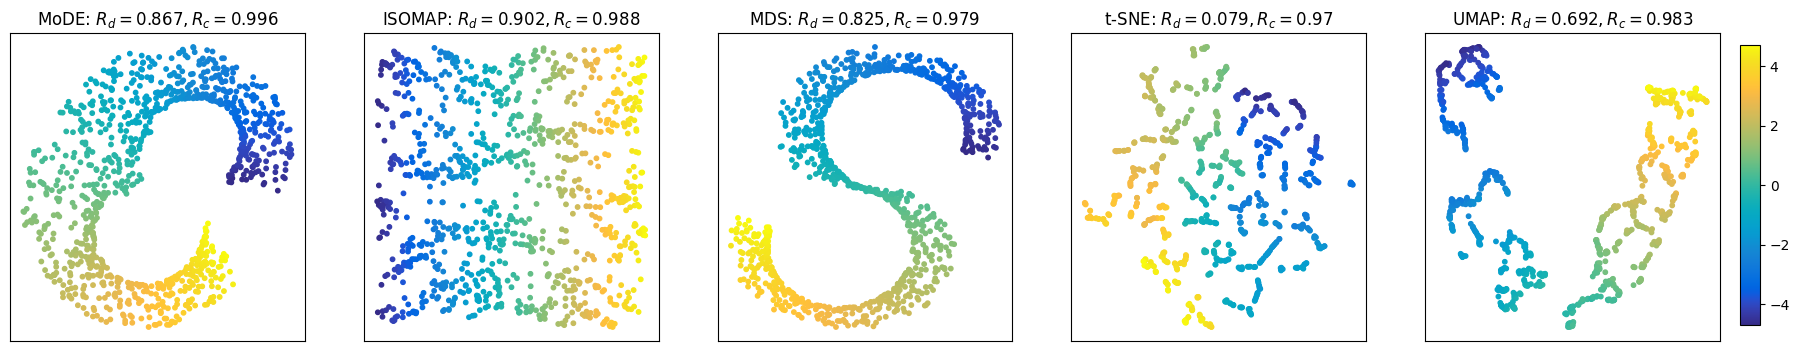

In [6]:
# colors = np.argsort(np.argsort(score.squeeze()))
marker_size = 10
fig, ax = plt.subplots(1,5, figsize=(20,4))
p1 = ax[0].scatter(x_2d_mode[:, 0], x_2d_mode[:,1], c=color, cmap=parula_map, s=marker_size)
R_d = distance_metric(X, x_2d_mode, n_neighbor=10)
R_c = correlation_metric(X, x_2d_mode, n_neighbor=10)
ax[0].set_title("MoDE: $R_d={}, R_c={}$".format(np.round(R_d, 3), np.round(R_c, 3)))


p2 = ax[1].scatter(x_2d_isomap[:, 0], x_2d_isomap[:,1], c=color, cmap=parula_map, s=marker_size)
R_d = distance_metric(X, x_2d_isomap, n_neighbor=10)
R_c = correlation_metric(X, x_2d_isomap, n_neighbor=10)
ax[1].set_title("ISOMAP: $R_d={}, R_c={}$".format(np.round(R_d, 3), np.round(R_c, 3)))


p3 = ax[2].scatter(x_2d_mds[:, 0], x_2d_mds[:,1], c=color, cmap=parula_map, s=marker_size)
R_d = distance_metric(X, x_2d_mds, n_neighbor=10)
R_c = correlation_metric(X, x_2d_mds, n_neighbor=10)
ax[2].set_title("MDS: $R_d={}, R_c={}$".format(np.round(R_d, 3), np.round(R_c, 3)))


p4 = ax[3].scatter(x_2d_tsne[:, 0], x_2d_tsne[:,1], c=color, cmap=parula_map, s=marker_size)
R_d = distance_metric(X, x_2d_tsne, n_neighbor=10)
R_c = correlation_metric(X, x_2d_tsne, n_neighbor=10)
ax[3].set_title("t-SNE: $R_d={}, R_c={}$".format(np.round(R_d, 3), np.round(R_c, 3)))


p5 = ax[4].scatter(x_2d_umap[:, 0], x_2d_umap[:,1], c=color, cmap=parula_map, s=marker_size)
R_d = distance_metric(X, x_2d_umap, n_neighbor=10)
R_c = correlation_metric(X, x_2d_umap, n_neighbor=10)
ax[4].set_title("UMAP: $R_d={}, R_c={}$".format(np.round(R_d, 3), np.round(R_c, 3)))

fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.01, 0.7])
cbar = fig.colorbar(p5, cax=cbar_ax)
# remove the x and y ticks
for a in ax:
    a.set_xticks([])
    a.set_yticks([])
# plt.savefig("figures/ESG.jpg", dpi=1200);
plt.show();